## **Problem 1**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming SYNDTR.csv and SYNDTE.csv are in the same directory.
train_data = pd.read_csv("SYNDTR.csv")
test_data = pd.read_csv("SYNDTE.csv")

TRI = train_data["TRI"].values
TROL = train_data["TROL"].values
TEI = test_data["TEI"].values
TEOL = test_data["TEOL"].values

In [6]:

def my_model_train(TRI, TROL, M):
    """Train the polynomial model using SVD-based single-shot LS solution."""
    # Create the design matrix
    X = np.vstack([TRI**i for i in range(M+1)]).T
    print(X)

    # Compute SVD of X
    U, s, Vt = np.linalg.svd(X, full_matrices=False)

    # Compute a_hat using SVD-based solution
    a_hat = Vt.T @ np.linalg.inv(np.diag(s)) @ U.T @ TROL

    return a_hat

def my_model_test(a_hat, TEI, TEOL):
    """Predict and compute the test-MSE."""
    # Create design matrix for test data
    X_test = np.vstack([TEI**i for i in range(len(a_hat))]).T

    # Predict
    predictions = X_test @ a_hat

    # Compute mean squared error
    mse = np.mean((predictions - TEOL)**2)

    return mse

# Example usage:
# TRI and TROL loaded from SYNDTR.csv
a_hat = my_model_train(TRI, TROL, 3)  # For M=3 as an example
# TEI and TEOL loaded from SYNDTE.csv
mse = my_model_test(a_hat, TEI, TEOL)

print(mse)


[[ 1.00000000e+00 -2.00000000e+00  4.00000000e+00 -8.00000000e+00]
 [ 1.00000000e+00 -1.97989950e+00  3.92000202e+00 -7.76121003e+00]
 [ 1.00000000e+00 -1.95979899e+00  3.84081210e+00 -7.52721969e+00]
 [ 1.00000000e+00 -1.93969849e+00  3.76243024e+00 -7.29798027e+00]
 [ 1.00000000e+00 -1.91959799e+00  3.68485644e+00 -7.07344302e+00]
 [ 1.00000000e+00 -1.89949749e+00  3.60809070e+00 -6.85355923e+00]
 [ 1.00000000e+00 -1.87939698e+00  3.53213303e+00 -6.63828016e+00]
 [ 1.00000000e+00 -1.85929648e+00  3.45698341e+00 -6.42755709e+00]
 [ 1.00000000e+00 -1.83919598e+00  3.38264185e+00 -6.22134130e+00]
 [ 1.00000000e+00 -1.81909548e+00  3.30910836e+00 -6.01958404e+00]
 [ 1.00000000e+00 -1.79899497e+00  3.23638292e+00 -5.82223661e+00]
 [ 1.00000000e+00 -1.77889447e+00  3.16446554e+00 -5.62925026e+00]
 [ 1.00000000e+00 -1.75879397e+00  3.09335623e+00 -5.44057628e+00]
 [ 1.00000000e+00 -1.73869347e+00  3.02305497e+00 -5.25616593e+00]
 [ 1.00000000e+00 -1.71859296e+00  2.95356178e+00 -5.07597049e

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

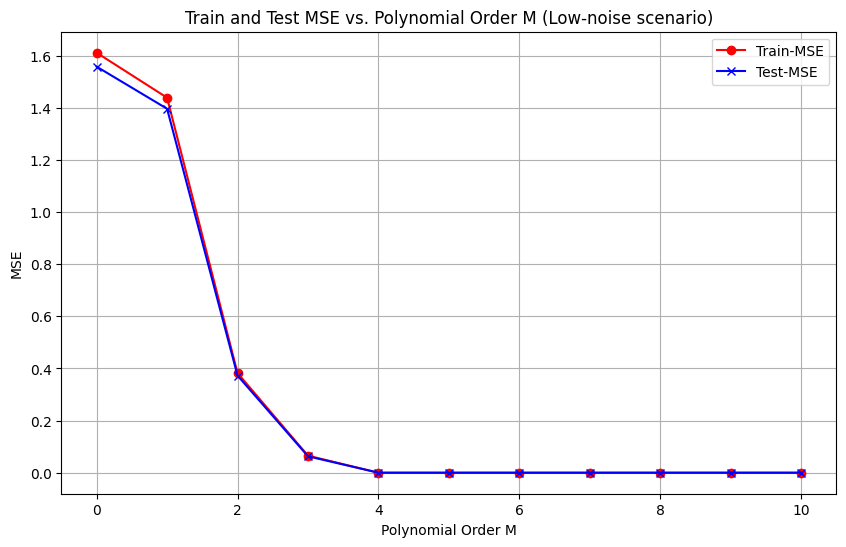

In [7]:
# Initialize lists to store MSE values
train_mses = []
test_mses = []

# Loop over the different values of M
for M in range(11):  # as M = 0, 1, ..., 10
    a_hat = my_model_train(TRI, TROL, M)

    train_mse = my_model_test(a_hat, TRI, TROL)
    test_mse = my_model_test(a_hat, TEI, TEOL)

    train_mses.append(train_mse)
    test_mses.append(test_mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(11), train_mses, 'r', label="Train-MSE", marker='o')
plt.plot(range(11), test_mses, 'b', label="Test-MSE", marker='x')
plt.xlabel("Polynomial Order M")
plt.ylabel("MSE")
plt.title("Train and Test MSE vs. Polynomial Order M (Low-noise scenario)")
plt.legend()
plt.grid(True)
plt.show()

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

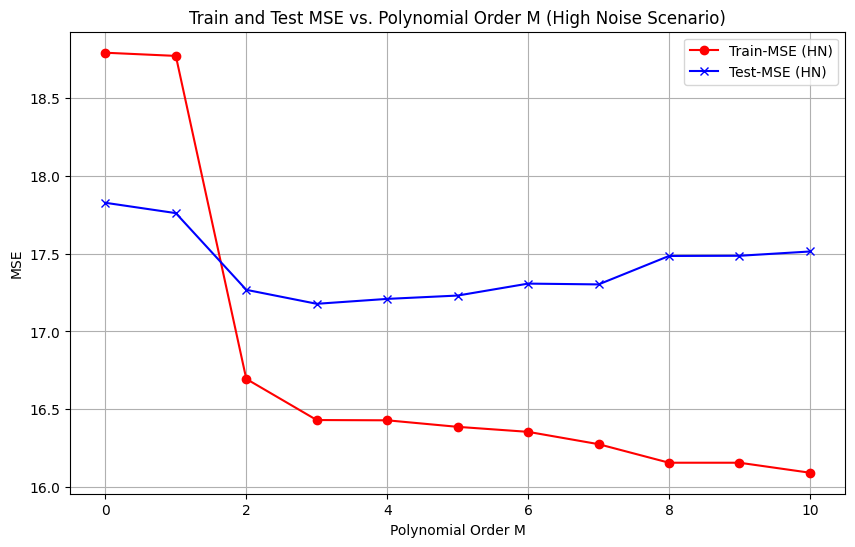

In [8]:
# Using TROH from train_data and TEOH from test_data for the high-noise scenario
TROH = train_data["TROH"].values
TEOH = test_data["TEOH"].values

# Initialize lists to store MSE values for high-noise scenario
train_mses_hn = []
test_mses_hn = []

# Loop over the different values of M
for M in range(11):  # as M = 0, 1, ..., 10
    a_hat = my_model_train(TRI, TROH, M)

    train_mse_hn = my_model_test(a_hat, TRI, TROH)
    test_mse_hn = my_model_test(a_hat, TEI, TEOH)

    train_mses_hn.append(train_mse_hn)
    test_mses_hn.append(test_mse_hn)

# Plotting for high-noise scenario
plt.figure(figsize=(10, 6))
plt.plot(range(11), train_mses_hn, 'r', label="Train-MSE (HN)", marker='o')
plt.plot(range(11), test_mses_hn, 'b', label="Test-MSE (HN)", marker='x')
plt.xlabel("Polynomial Order M")
plt.ylabel("MSE")
plt.title("Train and Test MSE vs. Polynomial Order M (High Noise Scenario)")
plt.legend()
plt.grid(True)
plt.show()


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

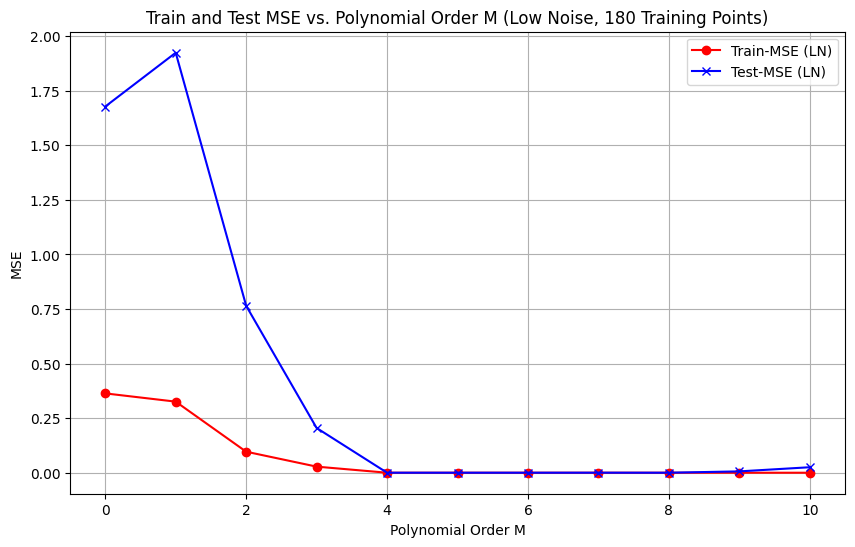

In [11]:
# Limit the training data to the first 180 data points
TRI_180 = TRI[:180]
TROL_180 = TROL[:180]

# Initialize lists to store MSE values for limited data
train_mses_ln_180 = []
test_mses_ln_180 = []

# Loop over the different values of M
for M in range(11):  # as M = 0, 1, ..., 10
    a_hat = my_model_train(TRI_180, TROL_180, M)

    train_mse_ln_180 = my_model_test(a_hat, TRI_180, TROL_180)
    test_mse_ln_180 = my_model_test(a_hat, TEI, TEOL)

    train_mses_ln_180.append(train_mse_ln_180)
    test_mses_ln_180.append(test_mse_ln_180)

# Plotting for limited data in low-noise scenario
plt.figure(figsize=(10, 6))
plt.plot(range(11), train_mses_ln_180, 'r', label="Train-MSE (LN)", marker='o')
plt.plot(range(11), test_mses_ln_180, 'b', label="Test-MSE (LN)", marker='x')
plt.xlabel("Polynomial Order M")
plt.ylabel("MSE")
plt.title("Train and Test MSE vs. Polynomial Order M (Low Noise, 180 Training Points)")
plt.legend()
plt.grid(True)
plt.show()


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

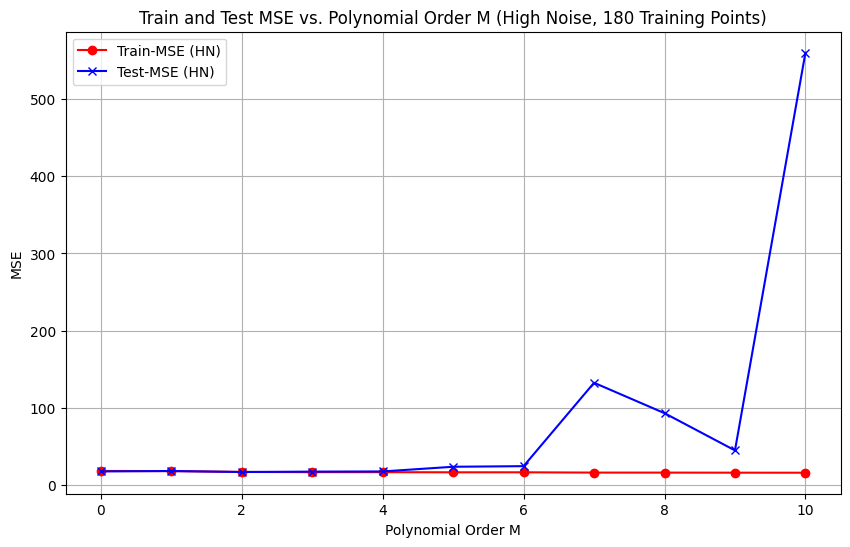

In [12]:
# Using TROH from train_data limited to the first 180 data points
TROH_180 = TROH[:180]

# Initialize lists to store MSE values for high-noise scenario with limited data
train_mses_hn_180 = []
test_mses_hn_180 = []

# Loop over the different values of M
for M in range(11):  # as M = 0, 1, ..., 10
    a_hat = my_model_train(TRI_180, TROH_180, M)

    train_mse_hn_180 = my_model_test(a_hat, TRI_180, TROH_180)
    test_mse_hn_180 = my_model_test(a_hat, TEI, TEOH)

    train_mses_hn_180.append(train_mse_hn_180)
    test_mses_hn_180.append(test_mse_hn_180)

# Plotting for high-noise scenario with limited data
plt.figure(figsize=(10, 6))
plt.plot(range(11), train_mses_hn_180, 'r', label="Train-MSE (HN)", marker='o')
plt.plot(range(11), test_mses_hn_180, 'b', label="Test-MSE (HN)", marker='x')
plt.xlabel("Polynomial Order M")
plt.ylabel("MSE")
plt.title("Train and Test MSE vs. Polynomial Order M (High Noise, 180 Training Points)")
plt.legend()
plt.grid(True)
plt.show()
